# Rijbewijshouders en slagingspercentages CBR (2024)
In deze Notebook analyseren we het aantal rijbewijshouders in Nederland over de afgelopen 10 jaar (2014-2024), verdeeld over verschillende voertuigcategorieën. De data is afkomstig van het CBR (Centraal Bureau Rijvaardigheidsbewijzen). [Link Rijbewijs](https://opendata.cbs.nl/#/CBS/nl/dataset/83488NED/table)

Daarnaast vergelijken we de slaagpercentages van de verschillende praktijkexamenlocaties van het CBR. Hierbij onderzoeken we welke locaties als moeilijk, gemiddeld of relatief eenvoudig worden beschouwd op basis van de behaalde resultaten.

Deze analyses geven inzicht in trends en regionale verschillen in rijvaardigheid en examenresultaten.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Inhoud van cbr.csv

Deze CSV bevat gegevens over rijbewijshouders in Nederland van 2014 tot 2024, 
verdeeld over verschillende leeftijdsgroepen en voertuigcategorieën. Hier is een overzicht van wat de data laat zien:

In [23]:
cbr = pd.read_csv("cbr.csv")
cbr.head()

,Jaar,Leeftijdsgroep,Autorijbewijs totaal,Busrijbewijs totaal,Bromfietsrijbewijs,Motorrijbewijs,Vrachtautorijbewijs totaal
0,2014,16 tot 18 jaar,12846,0,48201,0,0
1,2014,18 tot 20 jaar,170879,6,193771,1555,1087
2,2014,20 tot 25 jaar,748794,382,784561,33147,12658
3,2014,25 tot 30 jaar,824642,1769,833400,65738,25857
4,2014,30 tot 40 jaar,1733078,7890,1754755,194419,75200


## Hoeveel mensen hebben een Autorijbewijs in 2024?
Hier bereken we het totaal aantal Autorijbewijshouders van 2024.

In [24]:
Autorijbewijs_2024 = cbr[cbr["Jaar"] == 2024]

# Berekening van het totaal
totaal = Autorijbewijs_2024["Autorijbewijs totaal"].sum()

# Printen van het resultaat in miljoenen, met 1 decimaal
print(f"Op 1 januari 2024 hadden bijna {totaal / 1_000_000:.1f} miljoen mensen in Nederland een autorijbewijs.")

Op 1 januari 2024 hadden bijna 12.1 miljoen mensen in Nederland een autorijbewijs.


## Rijbewijshouders (2014-2024)

**Terugblik op 2014:** In 2014 hadden met name mensen in de leeftijdsgroepen 30-40 jaar (1,73 miljoen) en 50-60 jaar (2,11 miljoen) relatief vaak een rijbewijs. Het aantal rijbewijsbezitters onder 75-plussers was toen aanzienlijk lager, met slechts 563.517 personen.

**Vergelijking 2014-2024:** In de periode van 2014 tot 2024 is het aantal rijbewijsbezitters onder 75-plussers bijna verdubbeld: een toename van 494.080 personen. Deze groei weerspiegelt de vergrijzing en het feit dat steeds meer ouderen langer mobiel blijven. Ook het totale aantal autorijbewijshouders is toegenomen door een groeiende bevolking.

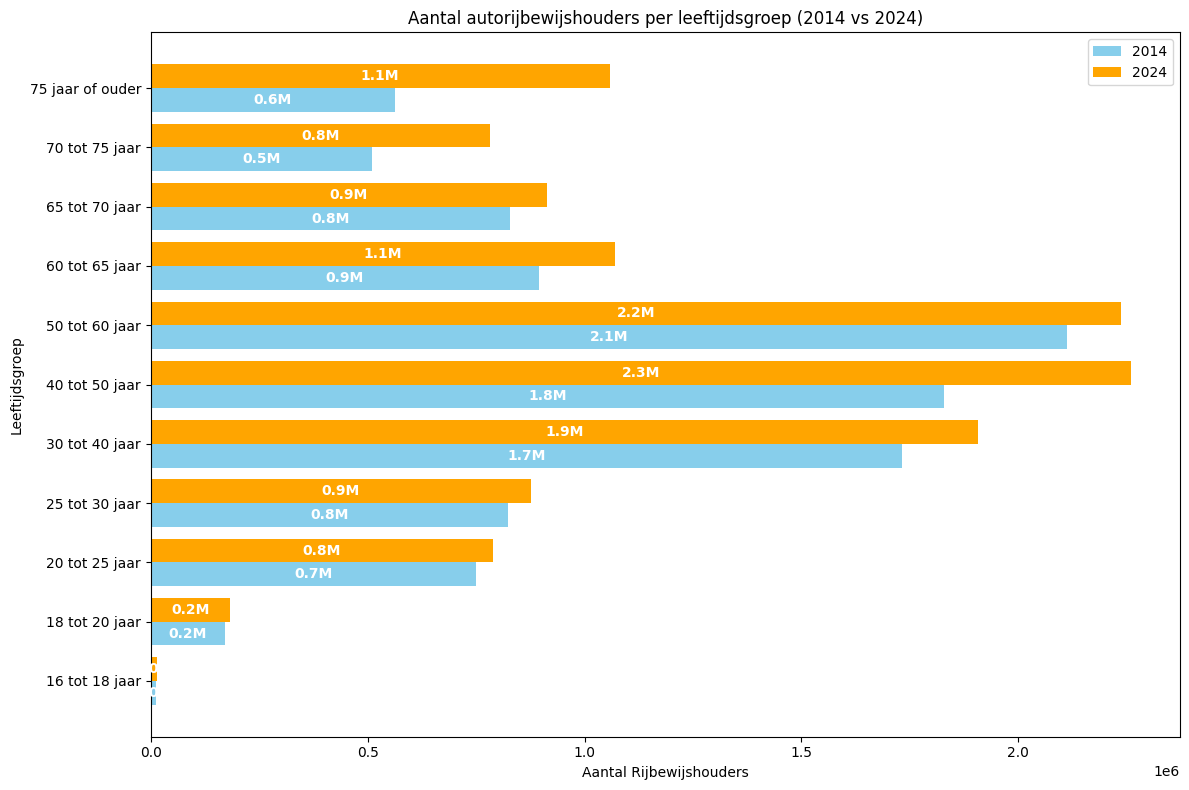

In [25]:
# Filter gegevens voor 2014 en 2024
filtered_data = cbr[cbr["Jaar"].isin([2014, 2024])]

# Pivot de gegevens
pivoted_data = filtered_data.pivot(index="Leeftijdsgroep", columns="Jaar", values="Autorijbewijs totaal")

# Leeftijdsgroepen en waarden per jaar
age_groups = pivoted_data.index
values_2014 = pivoted_data[2014]
values_2024 = pivoted_data[2024]

# Instellingen voor de grafiek
bar_width = 0.4
y_pos = np.arange(len(age_groups))

plt.figure(figsize=(12, 8))

# Plot de horizontale balken
bars_2014 = plt.barh(y_pos - bar_width / 2, values_2014, bar_width, label="2014", color='skyblue')
bars_2024 = plt.barh(y_pos + bar_width / 2, values_2024, bar_width, label="2024", color='orange')

# Voeg labels toe binnenin de balken
for bars, values in zip([bars_2014, bars_2024], [values_2014, values_2024]):
    for bar, value in zip(bars, values):
        width = bar.get_width()
        label = f"{value / 1_000_000:.1f}M"
        plt.text(width / 2, bar.get_y() + bar.get_height() / 2,
                 label, ha='center', va='center', color='white',
                 fontsize=10, fontweight='bold')

# Labels, titel en legenda
plt.yticks(y_pos, age_groups)
plt.xlabel("Aantal Rijbewijshouders")
plt.ylabel("Leeftijdsgroep")
plt.title("Aantal autorijbewijshouders per leeftijdsgroep (2014 vs 2024)")
plt.legend()
plt.tight_layout()
plt.show()



## Motorrijbewijs vs Bromfietsrijbewijs

De grafiek toont het totaal aantal houders van een Motorrijbewijs en Bromfietsrijbewijs per leeftijdsgroep voor het jaar 2024:

**Motorrijbewijs:** Het aantal rijbewijshouders neemt toe naarmate de leeftijdsgroep ouder wordt, met een piek van (2,26 miljoen) in de middelste leeftijdsgroepen (40-50 jaar en 50-60 jaar).
Daarna daalt het aantal rijbewijshouders met 65% bij de hogere leeftijdsgroepen (60+).

**Bromfietsrijbewijs:** We zien een lichte stijging bij de leeftijdsgroep (16-18 jaar), gevolgd door een sterke toename bij de groepen (20-25 jaar) tot (50-60 jaar). Deze groei kan samenhangen met het behalen van een autorijbewijs, waarbij automatisch ook een bromfietsrijbewijs wordt verkregen. Na de leeftijd van 50-60 jaar daalt het aantal bromfietsrijbewijshouders sterk, maar bij 75-plussers is er weer een lichte stijging. Dit kan erop wijzen dat ouderen vaker een brommobiel gebruiken vanwege mobiliteitsproblemen.

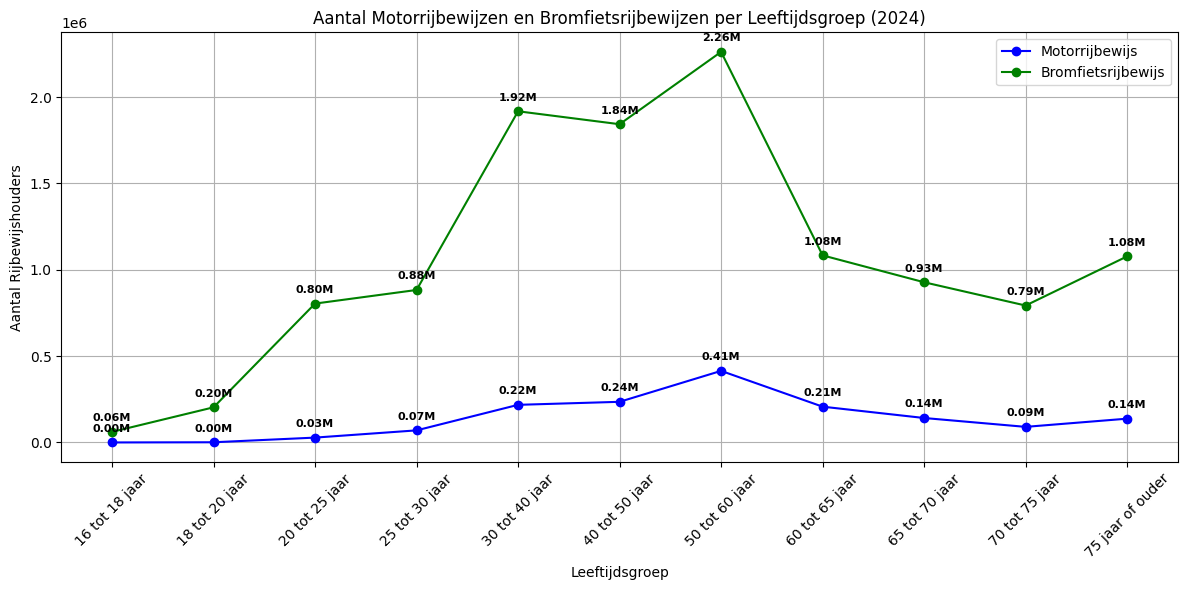

In [26]:
# Filter de gegevens voor het jaar 2024
data_2024 = cbr[cbr["Jaar"] == 2024]

# Selecteer relevante kolommen
rijbewijs_data = data_2024[["Leeftijdsgroep", "Motorrijbewijs", "Bromfietsrijbewijs"]]

# Sorteer op leeftijdsgroep
rijbewijs_data = rijbewijs_data.sort_values("Leeftijdsgroep")

# Lijngrafiek
plt.figure(figsize=(12, 6))

# Plot Motorrijbewijs
plt.plot(rijbewijs_data["Leeftijdsgroep"],
         rijbewijs_data["Motorrijbewijs"],
         marker="o", label="Motorrijbewijs", color="blue")

# Plot Bromfietsrijbewijs
plt.plot(rijbewijs_data["Leeftijdsgroep"],
         rijbewijs_data["Bromfietsrijbewijs"],
         marker="o", label="Bromfietsrijbewijs", color="green")

# Zichtbare labels boven de punten
offset_motor = 50_000
offset_brom = 50_000

# Motorrijbewijs-labels
for x, y in zip(rijbewijs_data["Leeftijdsgroep"], rijbewijs_data["Motorrijbewijs"]):
    plt.text(x, y + offset_motor,
             f"{y / 1_000_000:.2f}M", ha='center', va='bottom', fontweight='bold', fontsize=8, color='black')

# Bromfietsrijbewijs-labels
for x, y in zip(rijbewijs_data["Leeftijdsgroep"], rijbewijs_data["Bromfietsrijbewijs"]):
    plt.text(x, y + offset_brom,
             f"{y / 1_000_000:.2f}M", ha='center', va='bottom', fontweight='bold', fontsize=8, color='black')



# Labels, titel en legenda
plt.xlabel("Leeftijdsgroep")
plt.ylabel("Aantal Rijbewijshouders")
plt.title("Aantal Motorrijbewijzen en Bromfietsrijbewijzen per Leeftijdsgroep (2024)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



## Vrachtautorijbewijs vs Busrijbewijs (2014-2024)

De grafiek toont het aantal houders van Vrachtautorijbewijs en Busrijbewijs per jaar van 2014 tot 2024:

**Vrachtautorijbewijs:** Het aantal houders is aanzienlijk hoger dan dat van het busrijbewijs in elk jaar.
Er lijkt een stabiele trend te zijn, met lichte daling door de jaren heen.

**Busrijbewijs:** Het aantal houders is veel lager dan bij vrachtautorijbewijzen.
Een duidelijke daling is zichtbaar vanaf 2014, wat wijst op een afnemende interesse of behoefte aan busrijbewijzen.
De grafiek benadrukt het relatief grotere aandeel vrachtautorijbewijshouders in vergelijking met busrijbewijshouders, evenals een mogelijke dalende trend in de busrijbewijsbezitters over de tijd.

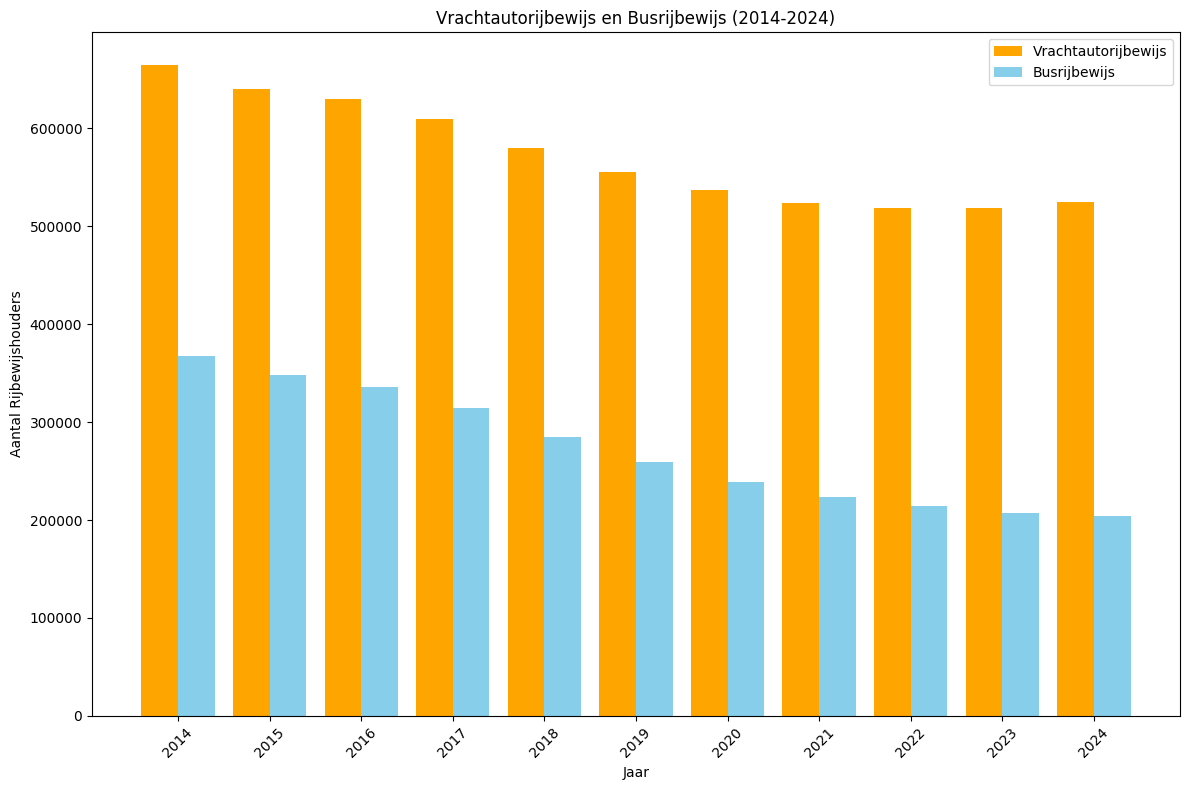

In [20]:
# Filtergegevens voor 2014 en 2024
filtered_data = cbr[cbr["Jaar"].isin(range(2014, 2025))]

# Gegevens per jaar samenvoegen
aggregated_data = filtered_data.groupby("Jaar")[["Vrachtautorijbewijs totaal", "Busrijbewijs totaal"]].sum()

# Waarden extraheren voor het plotten
values_vrachtauto = aggregated_data["Vrachtautorijbewijs totaal"].values
values_bus = aggregated_data["Busrijbewijs totaal"].values
years = aggregated_data.index

# Maak het horizontale staafdiagram
bar_width = 0.4
x_pos = np.arange(len(years))

plt.figure(figsize=(12, 8))

# Pl0t voor Vrachtautorijbewijs en Busrijbewijs door de jaren heen
plt.bar(x_pos - bar_width / 2, values_vrachtauto, bar_width, label="Vrachtautorijbewijs", color='orange')
plt.bar(x_pos + bar_width / 2, values_bus, bar_width, label="Busrijbewijs", color='skyblue')

# Voeg labels, titel en legenda toe
plt.xticks(x_pos, years, rotation=45)
plt.xlabel("Jaar")
plt.ylabel("Aantal Rijbewijshouders")
plt.title("Vrachtautorijbewijs en Busrijbewijs (2014-2024)")
plt.legend()

plt.tight_layout()
plt.show()


## Slagingspercentages per province
De kaart toont de slagingspercentages per provincie in Nederland, weergegeven met cirkels die verschillende kleuren hebben afhankelijk van het percentage:

* **Rood:** Provincies waar minder dan 45% van de mensen slaagt (bijvoorbeeld Zuid-Holland met 44.9%).
* **Geel:** Provincies met een slagingspercentage tussen 45% en 55% (bijvoorbeeld Noord-Holland en Utrecht).
* **Groen:** Provincies waar meer dan 55% van de mensen slaagt (bijvoorbeeld Limburg met 61.2% en Flevoland met 59.1%).

**Locaties:** De cirkels zijn geplaatst op de geografische coördinaten (Latitude, Longitude) van de respectieve provincies.
Interactie:

Als je op een cirkel klikt, verschijnt een popup met de naam van de provincie en het slagingspercentage.
Conclusie: De kaart geeft een visueel overzicht van hoe de slagingspercentages per provincie variëren, met duidelijke regionale verschillen in het succespercentage. Zuid-Holland scoort het laagst, terwijl Limburg het hoogste percentage laat zien. 

**Bron:** [Link Slagingspercentages](https://www.rijschoolpro.nl/rijschool/2018/01/18/grote-verschillen-in-slagingspercentages-cbr-examencentra/)

In [21]:
import pandas as pd
import folium

# Laad de gegevens
data = pd.read_csv("Slagingspercentage.csv")

# Basiskaart
m = folium.Map(location=[52.1, 5.3], zoom_start=7)

# kleurcodering op basis van het slagingspercentage
for index, row in data.iterrows():
    percentage = row['Percentage']
    
    if percentage < 45: 
        color = "red"
    elif 45 <= percentage <= 55:
        color = "yellow"
    else: 
        color = "green"
    
    # Voeg een cirkelmarkering toe aan de kaart
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=16,
        popup=f"{row['Province']}: {percentage}%",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

# Toon de kaart
m



## Conclusie van de visualisaties:

Op 2024 hadden bijna 12,5 miljoen Nederlanders een autorijbewijs.
In 2014 was het aantal rijbewijshouders het hoogst bij de groepen 30-40 jaar (1,73 miljoen) en 50-60 jaar (2,11 miljoen), terwijl 75-plussers destijds slechts 563.517 rijbewijzen hadden.
Tussen 2014 en 2024 is het aantal rijbewijshouders onder 75-plussers bijna verdubbeld (+494.080), wat de vergrijzing en de toegenomen mobiliteit bij ouderen weerspiegelt.

**Motorrijbewijs en Bromfietsrijbewijs per Leeftijdsgroep (2024):** Het aantal bromfietsrijbewijzen is het hoogst bij de leeftijdsgroep (50-60 jaar) en neemt sterk af met de leeftijd.
Het aantal motorrijbewijzen is juist hoger bij de oudere leeftijdsgroepen (30-60 jaar).

**Vrachtautorijbewijs en Busrijbewijs (2014-2024):** Het totaal aantal vrachtautorijbewijzen is aanzienlijk hoger dan busrijbewijzen in alle jaren.
Beide rijbewijzen tonen een stabiele trend met lichte schommelingen, zonder grote stijgingen of dalingen.

**Slagingspercentages per Provincie (Map):** Zuid-Holland heeft het laagste slagingspercentage (rood)(44.9%), terwijl provincies zoals Limburg en Flevoland bovengemiddeld presteren (groen)(59.1%-61.2%).
De geografische verschillen suggereren dat locatie een rol kan spelen in het slagingspercentage.

**Samenvatting:** De visualisaties tonen variaties in rijbewijzen op basis van leeftijd, type, en regio. Jongeren hebben vaker bromfietsrijbewijzen, terwijl ouderen domineren in motor- en autorijbewijzen. Vrachtautorijbewijzen zijn populairder dan busrijbewijzen, en het slagingspercentage verschilt per provincie. Over het decennium is het aantal autorijbewijshouders gestegen, vooral onder 75-plussers, door vergrijzing en een groeiende bevolking.